In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('stock_market_data_large.csv')
df.head(5)

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0


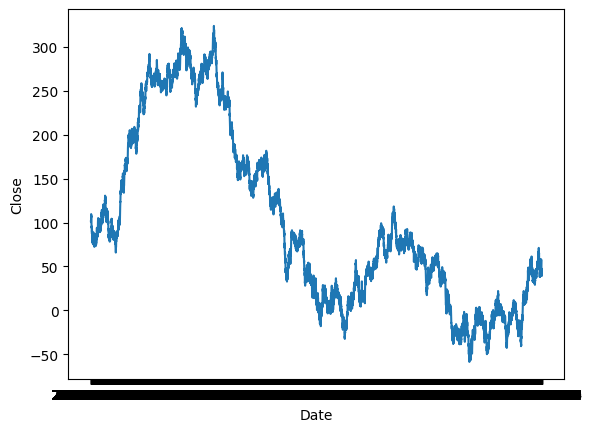

In [3]:
sns.lineplot(data=df, x='Date', y='Close')
plt.show()

In [4]:
# Target column value count
target_counts = df['Target'].value_counts()
print(target_counts)


Target
1    6836
0    6811
Name: count, dtype: int64


In [5]:
df.shape

(13647, 10)

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
RSI          0
MACD         0
Sentiment    0
Target       0
dtype: int64

In [ ]:
# Duplicates check
df.duplicated().sum()

np.int64(0)

In [ ]:
# df.fillna(df.mean(), inplace=True)  
# df.drop_duplicates(inplace=True)


num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())



In [ ]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
RSI          0
MACD         0
Sentiment    0
Target       0
dtype: int64

In [ ]:
import pandas as pd

# Numerical columns select 
num_cols = df.select_dtypes(include='number').columns

# Aggregation: Mean and  Mode
agg_df = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Mode': df[num_cols].mode().iloc[0]  
})

# Display
agg_df


,Mean,Mode
Open,1.010968e+02,-57.993581
High,1.026001e+02,-56.565948
Low,9.959930e+01,-60.262371
Close,1.010970e+02,-58.538240
Volume,2.563550e+06,264754.000000
RSI,4.990627e+01,0.000000
MACD,-2.698564e-02,-7.384103
Sentiment,-1.146381e-03,-0.999338
Target,5.009160e-01,1.000000


In [ ]:
import numpy as np
df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek
df['Day_sin'] = np.sin(2*np.pi*df['Day_of_Week']/6)
df['Day_cos'] = np.cos(2*np.pi*df['Day_of_Week']/6)
df.drop('Day_of_Week', axis=1, inplace=True)
df.head(5)

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Day_sin,Day_cos
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0,-8.660254e-01,-0.5
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1,0.000000e+00,1.0
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1,8.660254e-01,0.5
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0,8.660254e-01,-0.5
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0,1.224647e-16,-1.0


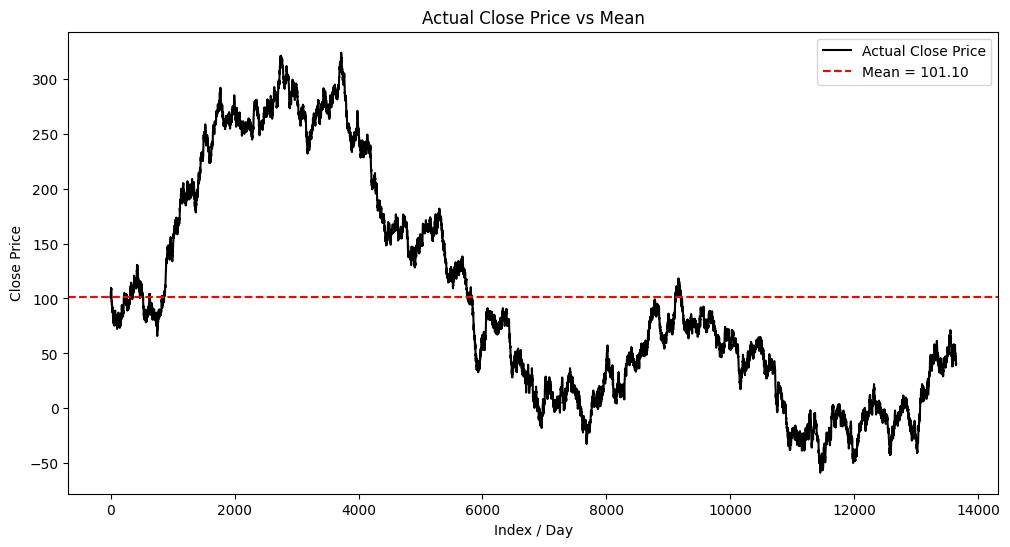

In [ ]:
import matplotlib.pyplot as plt

# Close column- 
mean_close = df['Close'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual Close Price', color='black')
plt.axhline(mean_close, color='red', linestyle='--', label=f'Mean = {mean_close:.2f}')
plt.xlabel('Index / Day')
plt.ylabel('Close Price')
plt.title('Actual Close Price vs Mean')
plt.legend()
plt.show()


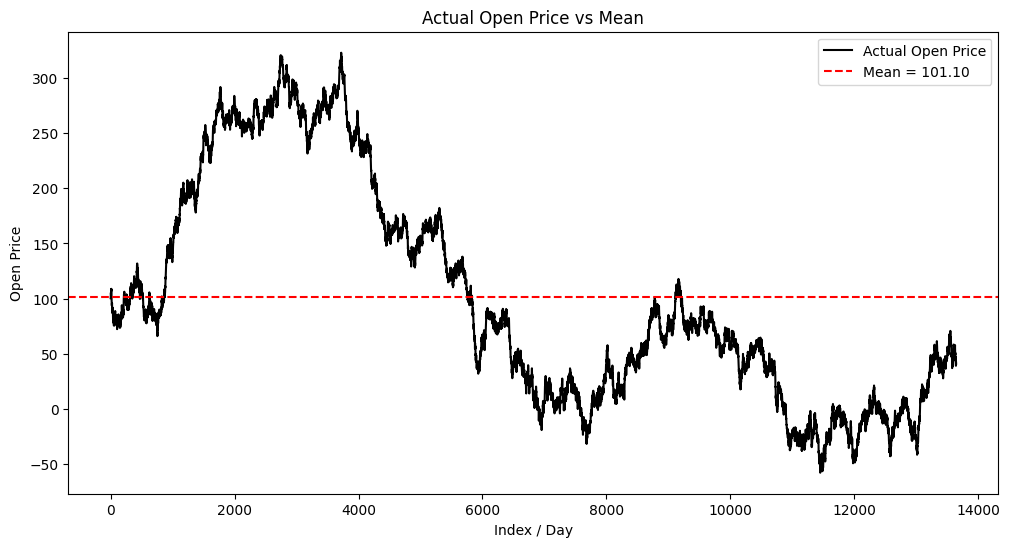

In [ ]:
import matplotlib.pyplot as plt

# Open column mean
mean_open = df['Open'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Actual Open Price', color='black')
plt.axhline(mean_open, color='red', linestyle='--', label=f'Mean = {mean_open:.2f}')
plt.xlabel('Index / Day')
plt.ylabel('Open Price')
plt.title('Actual Open Price vs Mean')
plt.legend()
plt.show()


In [ ]:
#Feature Engineering
# Price difference
df['Price_diff'] = df['Close'] - df['Open']

# Volatility (High - Low)
df['Volatility'] = df['High'] - df['Low']

# Moving Average (MA5)
df['MA5'] = df['Close'].rolling(window=5, min_periods=1).mean()


# Day of Week from Date
df['Date'] = pd.to_datetime(df['Date'])
# df['Day_of_Week'] = df['Date'].dt.dayofweek


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Day_sin,Day_cos,Price_diff,Volatility,MA5
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0,-8.660254e-01,-0.5,1.072158,2.918405,101.381330
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1,0.000000e+00,1.0,-0.750968,2.436783,100.888936
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1,8.660254e-01,0.5,1.444665,2.440321,101.596676
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0,8.660254e-01,-0.5,1.598528,3.892477,102.659093
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0,1.224647e-16,-1.0,-0.617975,2.466051,103.071567
5,2010-01-08,103.706622,106.241324,103.106346,104.405219,3688429,62.470552,0.687263,-0.063076,1,-8.660254e-01,-0.5,0.698597,3.134978,103.676345
6,2010-01-11,106.970913,108.267172,105.139529,106.597955,3909135,65.151281,0.935535,0.078400,1,0.000000e+00,1.0,-0.372958,3.127643,104.916627
7,2010-01-12,108.463029,111.081403,107.759084,109.603060,1756061,55.483691,1.359113,-0.596560,0,8.660254e-01,0.5,1.140031,3.322318,106.234808
8,2010-01-13,107.276693,109.498200,106.060857,107.793970,915340,46.913708,1.531172,0.788708,1,8.660254e-01,-0.5,0.517277,3.437343,106.624334
9,2010-01-14,108.830229,110.679572,106.818216,109.003930,3990597,46.387851,1.745048,-0.426418,0,1.224647e-16,-1.0,0.173701,3.861356,107.480827


In [ ]:
df.shape

(13647, 15)

In [ ]:
#Normalization / Standardization
# Numerical features
num_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'Sentiment', 'Price_diff', 'Volatility', 'MA5']

# Min-Max Scaling
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Day_sin,Day_cos,Price_diff,Volatility,MA5
0,2010-01-01,0.415504,0.418860,0.419937,0.418462,0.131342,0.777604,0.503257,0.528935,0,-8.660254e-01,-0.5,0.770116,0.480082,0.417678
1,2010-01-04,0.417705,0.416073,0.418420,0.415885,0.529175,0.834341,0.497902,0.875645,1,0.000000e+00,1.0,0.311792,0.358530,0.416365
2,2010-01-05,0.418807,0.422037,0.424361,0.422729,0.597391,0.732921,0.507989,0.989945,1,8.660254e-01,0.5,0.863762,0.359423,0.418252
3,2010-01-06,0.425842,0.429144,0.427642,0.430146,0.865582,0.754839,0.531247,0.070695,0,8.660254e-01,-0.5,0.902443,0.725917,0.421084
4,2010-01-07,0.428707,0.427385,0.429629,0.427202,0.409393,0.744509,0.543034,0.632162,0,1.224647e-16,-1.0,0.345226,0.365917,0.422184
5,2010-01-08,0.424422,0.428062,0.428551,0.426375,0.732325,0.639969,0.550096,0.468327,1,-8.660254e-01,-0.5,0.676205,0.534740,0.423797
6,2010-01-11,0.432990,0.433389,0.433884,0.432112,0.777370,0.667431,0.567017,0.539095,1,0.000000e+00,1.0,0.406821,0.532889,0.427104
7,2010-01-12,0.436906,0.440788,0.440756,0.439976,0.337934,0.568393,0.595886,0.201473,0,8.660254e-01,0.5,0.787179,0.582021,0.430618
8,2010-01-13,0.433792,0.436626,0.436301,0.435242,0.166345,0.480600,0.607612,0.894398,1,8.660254e-01,-0.5,0.630622,0.611051,0.431657
9,2010-01-14,0.437870,0.439732,0.438288,0.438408,0.793996,0.475212,0.622189,0.286580,0,1.224647e-16,-1.0,0.544249,0.718063,0.433940


In [ ]:

# Standardization   : not necessary
# scaler_std = StandardScaler()
# df[num_features] = scaler_std.fit_transform(df[num_features])
# df.head(10)


In [7]:









# Target এবং Features
X = df.drop(['Date', 'Target'], axis=1)
y = df['Target']

# Random split (train → test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)




# # Chronological split (past → future)
# train_size = int(len(df) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9552, 8)
X_test shape: (4095, 8)
y_train shape: (9552,)
y_test shape: (4095,)


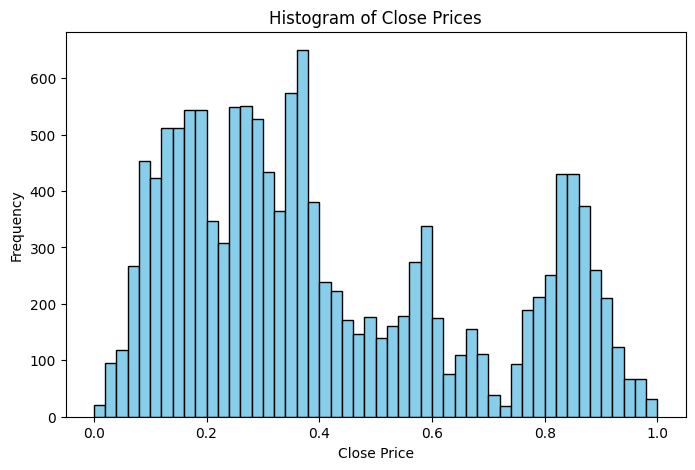

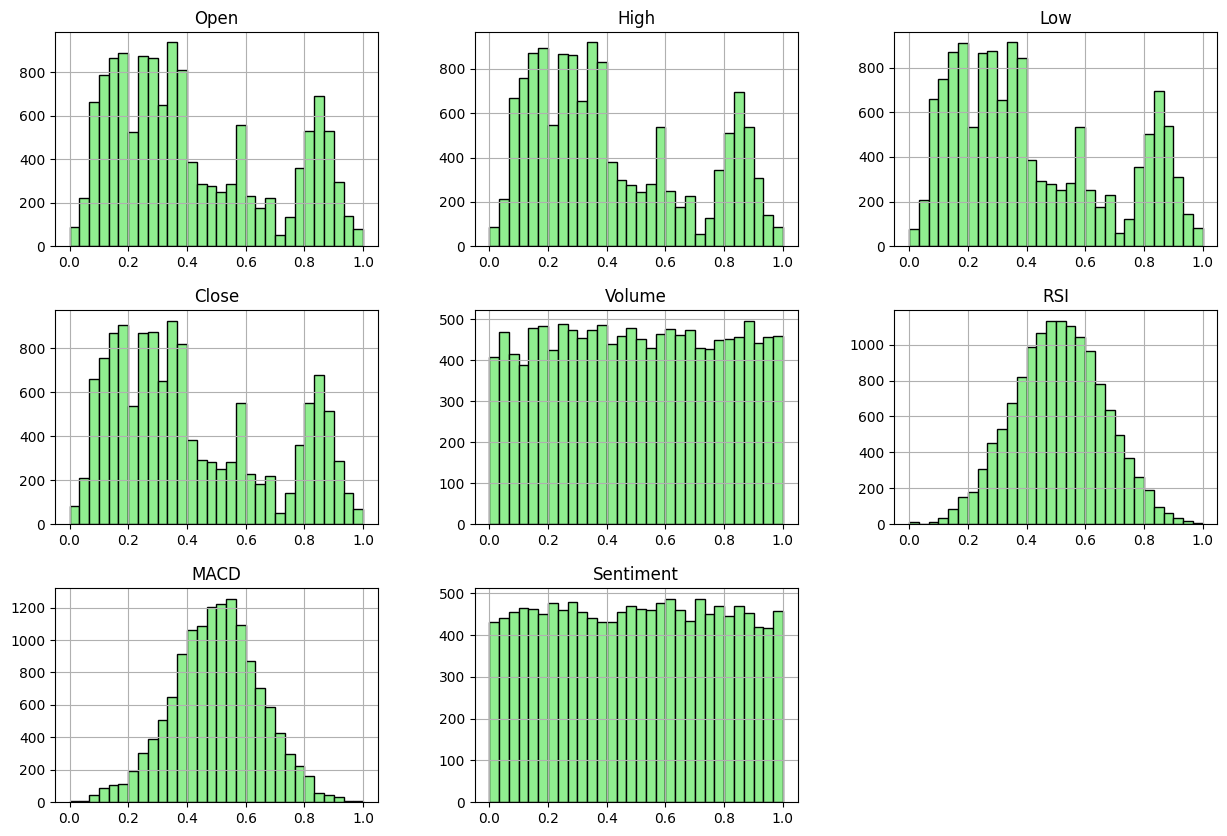

In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram of 'Close' prices
plt.figure(figsize=(8,5))
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Optional: Histogram for multiple numerical columns
numerical_cols = ['Open','High','Low','Close','Volume','RSI','MACD','Sentiment']
df[numerical_cols].hist(bins=30, figsize=(15,10), color='lightgreen', edgecolor='black')
plt.show()


In [ ]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Scatter plot: Close vs Volume
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='Volume', y='Close', data=df)
# plt.title("Scatter Plot: Close vs Volume")
# plt.show()

# # Histogram: Close prices distribution
# plt.figure(figsize=(8,5))
# plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
# plt.title("Histogram of Close Prices")
# plt.xlabel("Close Price")
# plt.ylabel("Frequency")
# plt.show()

# # Optional: Pairplot for selected features
# sns.pairplot(df[['Open','High','Low','Close','Volume','RSI']])
# plt.show()


In [ ]:
df

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Day_sin,Day_cos,Price_diff,Volatility,MA5
0,2010-01-01,0.415504,0.418860,0.419937,0.418462,0.131342,0.777604,0.503257,0.528935,0,-8.660254e-01,-0.5,0.770116,0.480082,0.417678
1,2010-01-04,0.417705,0.416073,0.418420,0.415885,0.529175,0.834341,0.497902,0.875645,1,0.000000e+00,1.0,0.311792,0.358530,0.416365
2,2010-01-05,0.418807,0.422037,0.424361,0.422729,0.597391,0.732921,0.507989,0.989945,1,8.660254e-01,0.5,0.863762,0.359423,0.418252
3,2010-01-06,0.425842,0.429144,0.427642,0.430146,0.865582,0.754839,0.531247,0.070695,0,8.660254e-01,-0.5,0.902443,0.725917,0.421084
4,2010-01-07,0.428707,0.427385,0.429629,0.427202,0.409393,0.744509,0.543034,0.632162,0,1.224647e-16,-1.0,0.345226,0.365917,0.422184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13642,2062-04-18,0.265804,0.265493,0.266008,0.262047,0.543679,0.325407,0.380088,0.518920,0,8.660254e-01,0.5,0.080923,0.568214,0.269595
13643,2062-04-19,0.254647,0.259115,0.259394,0.255780,0.343807,0.315905,0.347154,0.557664,1,8.660254e-01,-0.5,0.547512,0.592290,0.265204
13644,2062-04-20,0.264671,0.263654,0.263005,0.264742,0.416741,0.302002,0.341751,0.818044,0,1.224647e-16,-1.0,0.448456,0.680490,0.262730
13645,2062-04-21,0.261504,0.261589,0.263268,0.261003,0.216393,0.352392,0.331588,0.428091,0,-8.660254e-01,-0.5,0.392443,0.456976,0.259477


In [ ]:
# Correlation matrix
corr_matrix = df.corr()


corr_matrix


,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Day_sin,Day_cos,Price_diff,Volatility,MA5
Date,1.000000,-0.761410,-0.761399,-0.761347,-0.761375,0.004700,-0.017446,-0.021045,0.004397,-0.010965,0.000024,0.000037,-0.001810,-0.020238,-0.761372
Open,-0.761410,1.000000,0.999967,0.999968,0.999968,-0.008313,0.008490,0.061976,0.002969,0.000342,-0.000109,0.000099,0.004086,0.018182,0.999753
High,-0.761399,0.999967,1.000000,0.999968,0.999968,-0.008292,0.008363,0.062090,0.003018,0.000240,-0.000069,0.000159,0.008155,0.022239,0.999752
Low,-0.761347,0.999968,0.999968,1.000000,0.999968,-0.008266,0.008497,0.062020,0.003089,0.000311,-0.000140,0.000100,0.008117,0.014179,0.999752
Close,-0.761375,0.999968,0.999968,0.999968,1.000000,-0.008368,0.008438,0.062173,0.003041,-0.000975,-0.000200,0.000145,0.012121,0.018219,0.999757
Volume,0.004700,-0.008313,-0.008292,-0.008266,-0.008368,1.000000,0.011663,-0.006362,-0.012269,0.007683,0.011509,-0.003454,-0.006840,-0.003370,-0.008461
RSI,-0.017446,0.008490,0.008363,0.008497,0.008438,0.011663,1.000000,0.397609,0.008130,0.191089,-0.004191,0.001080,-0.006483,-0.016500,-0.001380
MACD,-0.021045,0.061976,0.062090,0.062020,0.062173,-0.006362,0.397609,1.000000,0.012394,-0.003181,-0.000093,0.001073,0.024936,0.009849,0.057561
Sentiment,0.004397,0.002969,0.003018,0.003089,0.003041,-0.012269,0.008130,0.012394,1.000000,0.005062,0.002276,0.005235,0.009056,-0.008739,0.002904
Target,-0.010965,0.000342,0.000240,0.000311,-0.000975,0.007683,0.191089,-0.003181,0.005062,1.000000,-0.002252,-0.015805,-0.163783,-0.008815,0.000227


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()


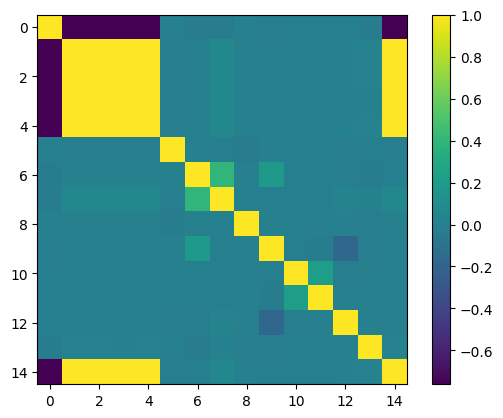

In [ ]:
import matplotlib.pyplot as plt

corr = df.corr()
plt.imshow(corr)
plt.colorbar()
plt.show()


In [10]:
#decesion tre algorithom
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=1
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5843711843711844
